In [3]:
import pathlib

import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from transforms import transforms

IMG_DIR = pathlib.Path("images/")

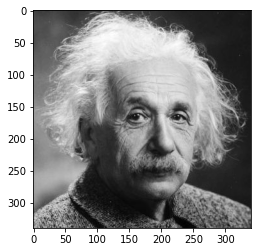

In [4]:
img = cv2.imread(str(IMG_DIR / "Albert_Einstein.jpg"), flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.show()

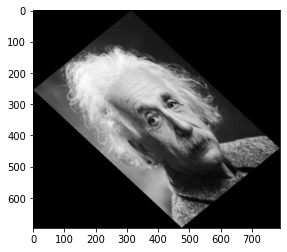

In [5]:
img_affine = cv2.imread(str(IMG_DIR / "Albert_Einstein_affine.jpg"), flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(img_affine, cmap="gray")
plt.show()

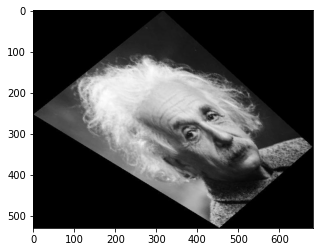

In [11]:
img_projective = cv2.imread(str(IMG_DIR / "Albert_Einstein_projective.jpg"), flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(img_projective, cmap="gray")
plt.show()

### Affine Transformation Estimation with 3 Points

In [23]:
def get_points(img, n_points):
    %matplotlib tk
    fig = plt.figure(figsize=(10, 15))
    plt.imshow(img, cmap="gray")
    points = np.array(plt.ginput(n=n_points)).round(0)
    points = points[:, [1, 0]].transpose()
    plt.close()
    %matplotlib inline
    return points

In [24]:
p = get_points(img, 3)
p

array([[165., 168., 214.],
       [151., 237., 208.]])

In [25]:
p_dash = get_points(img_affine, 3)  # -> to homogenous
p_dash

array([[366., 298., 384.],
       [369., 457., 498.]])

In [26]:
p = np.vstack((p, np.ones((1, 3))))
p

array([[165., 168., 214.],
       [151., 237., 208.],
       [  1.,   1.,   1.]])

In [27]:
p_dash = np.vstack((p_dash, np.ones((1, 3))))
p_dash

array([[366., 298., 384.],
       [369., 457., 498.],
       [  1.,   1.,   1.]])

In [28]:
# P_dash = A @ P
# Where A is a some affine transformation. Therefore...

affine_transform = p_dash @ np.linalg.inv(p)
affine_transform.round(1)

array([[  1.3,  -0.8, 271.1],
       [  1.5,   1. , -25.6],
       [ -0. ,  -0. ,   1. ]])

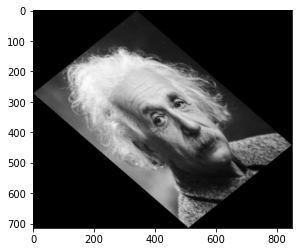

In [29]:
plt.imshow(transforms.apply_projective_transform(affine_transform, img), cmap="gray")
plt.show()

### Affine Transformation Estimation with More Than 3 Points

In [30]:
p = get_points(img, 5)
p

array([[170.,  95., 171., 285., 280.],
       [144., 196., 245., 245., 144.]])

In [32]:
p_dash = get_points(img_affine, 5)
p_dash

array([[359., 254., 298., 424., 485.],
       [370., 347., 464., 586., 530.]])

In [34]:
p = np.vstack((p, np.ones((1, 5))))  # -> to homogenous
p

array([[170.,  95., 171., 285., 280.],
       [144., 196., 245., 245., 144.],
       [  1.,   1.,   1.,   1.,   1.]])

In [35]:
p_dash = np.vstack((p_dash, np.ones((1, 5))))
p_dash

array([[359., 254., 298., 424., 485.],
       [370., 347., 464., 586., 530.],
       [  1.,   1.,   1.,   1.,   1.]])

In [46]:
# P_dash @ P.T = A @ P @ P.T
# Where A is a some affine transformation. Therefore...

affine_transform = p_dash @ p.T @ np.linalg.inv(p @ p.T)
affine_transform.round(1)

array([[  1.1,  -0.6, 271.7],
       [  1.2,   0.7,  88.7],
       [ -0. ,   0. ,   1. ]])

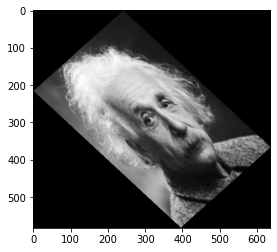

In [47]:
plt.imshow(transforms.apply_projective_transform(affine_transform, img), cmap="gray")
plt.show()